<a href="https://colab.research.google.com/github/Reconocimiento-de-patrones-UNQ/Clases2a4/blob/main/SupportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines (SVMs)

Hemos explorado clasificadores como Regresión Lineal y Logisticay. Ahora, nos adentraremos en los Support Vector Machines (SVMs), modelos potentes y versátiles, especialmente conocidos por su eficacia en problemas de clasificación de conjuntos de datos complejos, incluso con un tamaño pequeño o mediano.

La idea fundamental detrás de los SVMs es encontrar el 'mejor' límite de decisión que no solo separe las clases, sino que lo haga con el mayor margen posible entre ellas. Piensa en ello como encontrar la 'calle más ancha' que separa dos grupos de datos.

Para entender los SVMs, empecemos con la clasificación lineal. Si tenemos dos clases de datos que pueden ser separadas por una línea recta (o un hiperplano en dimensiones superiores), un SVM buscará la línea (o hiperplano) que maximice la distancia a las observaciones más cercanas de cada clase. Esta distancia se conoce como el margen.

**Límite de Decisión**: La línea que separa las clases.

**Vectores de Soporte**: Son las observaciones de entrenamiento que se encuentran más cerca del límite de decisión. Son los puntos que 'soportan' el margen y, por lo tanto, influyen directamente en la posición y orientación del límite de decisión. Si se eliminan o se mueven otros puntos (no vectores de soporte), el límite de decisión no cambia.
El objetivo de un SVM lineal es encontrar el límite de decisión que maximiza este margen, lo que generalmente conduce a una mejor generalización en datos no vistos.

Precisión del SVC Lineal en el conjunto de prueba: 1.00


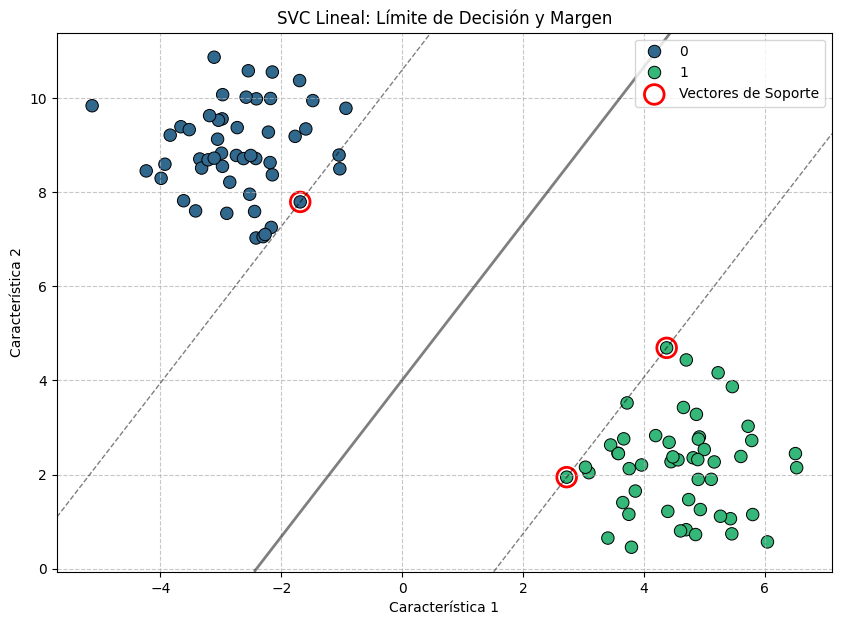


Observa los puntos con bordes rojos: esos son los 'Vectores de Soporte'.
Son los puntos más cercanos al límite de decisión (línea central continua) y
son cruciales para definir el margen (las líneas discontinuas).
El objetivo del SVC lineal es encontrar el margen más amplio posible para separar las clases.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

# Generar datos linealmente separables
X_linear, y_linear = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)

# Dividir datos
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_linear, y_linear, test_size=0.3, random_state=42)

# --- Entrenar un SVC Lineal ---
# kernel='linear' especifica un clasificador lineal
# C es el parámetro de regularización (veremos más adelante), un valor grande significa menos regularización
svc_linear = SVC(kernel='linear', C=10000, random_state=42)
svc_linear.fit(X_train_lin, y_train_lin)

# --- Evaluar el modelo ---
y_pred_lin = svc_linear.predict(X_test_lin)
accuracy_lin = accuracy_score(y_test_lin, y_pred_lin)
print(f"Precisión del SVC Lineal en el conjunto de prueba: {accuracy_lin:.2f}")

# --- Visualizar el límite de decisión y los vectores de soporte ---
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_linear[:, 0], y=X_linear[:, 1], hue=y_linear, palette='viridis', s=80, edgecolors='black', legend='full')

# Obtener los vectores de soporte
# svc_linear.support_vectors_ contiene los puntos de los vectores de soporte
plt.scatter(svc_linear.support_vectors_[:, 0], svc_linear.support_vectors_[:, 1],
            s=200, facecolors='none', edgecolors='red', linewidth=2, label='Vectores de Soporte')

# Graficar el límite de decisión y el margen
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Crear una malla para graficar el límite de decisión
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc_linear.decision_function(xy).reshape(XX.shape) # Distancia al hiperplano

# Graficar el límite de decisión (donde Z=0) y los márgenes (donde Z=-1 y Z=1)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'], linewidths=[1, 2, 1])

plt.title("SVC Lineal: Límite de Decisión y Margen")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("\nObserva los puntos con bordes rojos: esos son los 'Vectores de Soporte'.")
print("Son los puntos más cercanos al límite de decisión (línea central continua) y")
print("son cruciales para definir el margen (las líneas discontinuas).")
print("El objetivo del SVC lineal es encontrar el margen más amplio posible para separar las clases.")

En este script, generamos datos que son linealmente separables.

El gráfico muestra los puntos de datos de dos clases.
La línea continua negra es el límite de decisión que el SVC ha encontrado. Es la frontera que el modelo usa para clasificar nuevas observaciones.
Las líneas discontinuas negras representan el margen. La distancia entre estas dos líneas (y entre cada una de ellas y el límite de decisión) es maximizada por el algoritmo.
Los puntos con bordes rojos son los vectores de soporte. Son las observaciones de entrenamiento que están en el margen (o lo cruzan, si el parámetro C lo permite). Son los puntos más influyentes en la definición del límite de decisión. Si elimináramos todos los demás puntos de entrenamiento, el límite de decisión no cambiaría; solo los vectores de soporte importan para la posición final del hiperplano.

##  Clasificación No Lineal con Support Vector Machines: El Truco del Kernel

¿Qué pasa si los datos no son linealmente separables? Los SVMs tienen una solución elegante: el Truco del Kernel (Kernel Trick).

El truco del kernel permite a los SVMs encontrar límites de decisión no lineales transformando implícitamente los datos a un espacio de dimensiones superiores donde, en ese nuevo espacio, pueden ser linealmente separables. El SVM no necesita calcular explícitamente estas nuevas dimensiones, solo calcula la similitud entre los puntos en el espacio original usando una función kernel.

Las funciones kernel más comunes son:

**Kernel Polinomial**: Añade características polinomiales (como X², X³, etc.) al espacio dimensional. Es útil para datos que tienen una relación curva. El parámetro degree controla el grado del polinomio.

**Kernel Radial Basis Function (RBF) / Gaussiano**: Este es uno de los kernels más populares y versátiles. Crea 'colinas' o 'valles' alrededor de los puntos de datos en un espacio de dimensiones infinitas, permitiendo clasificar conjuntos de datos muy complejos. El parámetro gamma controla la influencia de un solo punto de entrenamiento (cuanto más pequeño sea gamma, más grande será la influencia)."

<Axes: >

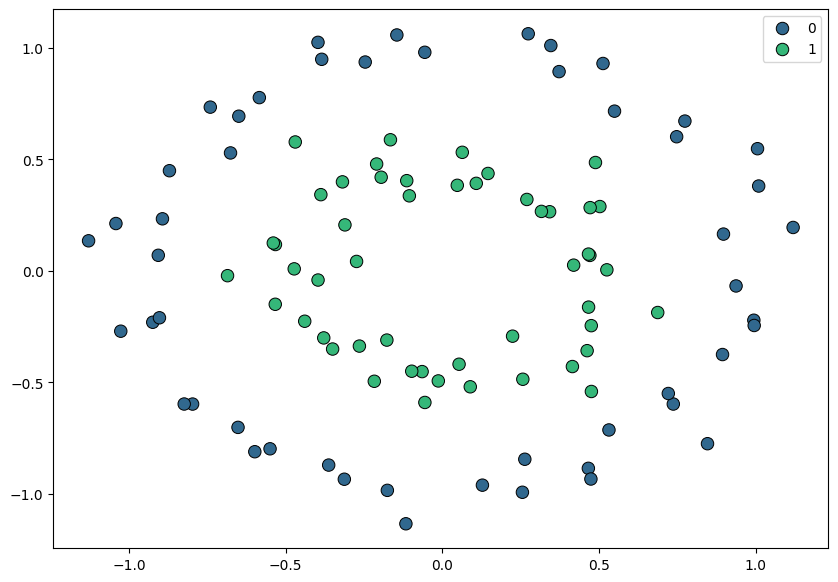

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

# Generar datos no linealmente separables (círculos)
X_non_linear, y_non_linear = make_circles(n_samples=100, factor=0.5, noise=0.08, random_state=42)

# Dividir datos
X_train_nonlin, X_test_nonlin, y_train_nonlin, y_test_nonlin = train_test_split(X_non_linear, y_non_linear, test_size=0.3, random_state=42)
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_non_linear[:, 0], y=X_non_linear[:, 1], hue=y_non_linear, palette='viridis', s=80, edgecolors='black', legend='full')


Precisión del SVC RBF en el conjunto de prueba: 1.00


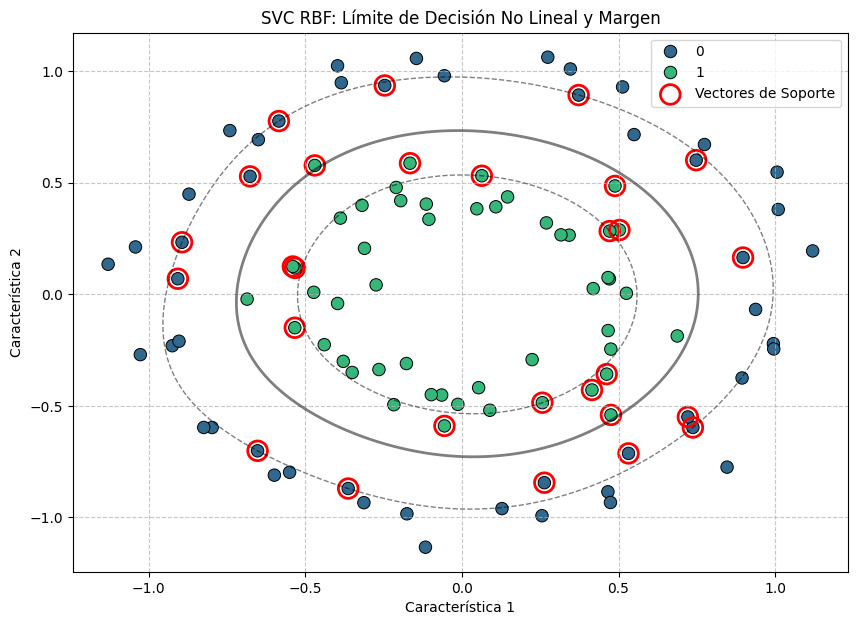


Con el kernel RBF, el SVC puede encontrar límites de decisión complejos y no lineales.
Observa cómo el margen ahora se adapta a la forma de los datos, permitiendo una separación efectiva.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

# Generar datos no linealmente separables (círculos)
X_non_linear, y_non_linear = make_circles(n_samples=100, factor=0.5, noise=0.08, random_state=42)

# Dividir datos
X_train_nonlin, X_test_nonlin, y_train_nonlin, y_test_nonlin = train_test_split(X_non_linear, y_non_linear, test_size=0.3, random_state=42)

# --- Entrenar un SVC con Kernel RBF ---
# kernel='rbf' para usar la función de base radial
# C y gamma son hiperparámetros cruciales
svc_rbf = SVC(kernel='rbf', C=1, gamma='scale', random_state=42) # 'scale' usa 1 / (n_features * X.var())
svc_rbf.fit(X_train_nonlin, y_train_nonlin)

# --- Evaluar el modelo ---
y_pred_nonlin = svc_rbf.predict(X_test_nonlin)
accuracy_nonlin = accuracy_score(y_test_nonlin, y_pred_nonlin)
print(f"Precisión del SVC RBF en el conjunto de prueba: {accuracy_nonlin:.2f}")

# --- Visualizar el límite de decisión (no lineal) ---
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_non_linear[:, 0], y=X_non_linear[:, 1], hue=y_non_linear, palette='viridis', s=80, edgecolors='black', legend='full')

# Obtener los vectores de soporte (con kernel RBF, a menudo son más)
plt.scatter(svc_rbf.support_vectors_[:, 0], svc_rbf.support_vectors_[:, 1],
            s=200, facecolors='none', edgecolors='red', linewidth=2, label='Vectores de Soporte')

# Crear una malla para graficar el límite de decisión
xlim = plt.xlim()
ylim = plt.ylim()
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc_rbf.decision_function(xy).reshape(XX.shape)

# Graficar el límite de decisión (Z=0) y los márgenes (Z=-1 y Z=1)
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'], linewidths=[1, 2, 1])

plt.title("SVC RBF: Límite de Decisión No Lineal y Margen")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("\nCon el kernel RBF, el SVC puede encontrar límites de decisión complejos y no lineales.")
print("Observa cómo el margen ahora se adapta a la forma de los datos, permitiendo una separación efectiva.")

Aquí, generamos datos que forman círculos concéntricos, que no pueden ser separados por una línea recta.

Al usar kernel='rbf', el SVC puede transformar implícitamente estos datos a un espacio de dimensiones superiores, donde se vuelven linealmente separables.
El gráfico muestra el límite de decisión no lineal (la forma curva u ovalada) y el margen. El SVC es capaz de separar las clases con alta precisión.
Los vectores de soporte (bordes rojos) siguen siendo los puntos clave que definen esta frontera compleja.

## Regresión con Support Vector Machines (SVR)
Los SVMs no solo sirven para clasificación; también pueden realizar tareas de regresión, en cuyo caso se les llama Support Vector Regression (SVR).

La idea es similar: en lugar de ajustar una línea que maximice el margen entre clases, el SVR ajusta una función (línea o curva) que se mantiene dentro de un margen de error (ϵ) de la mayoría de los puntos, penalizando solo las predicciones que caen fuera de ese margen. Es decir, busca una función que se ajuste 'lo suficientemente bien' a los datos, ignorando los errores pequeños dentro del margen ϵ y penalizando los errores grandes.

Error Cuadrático Medio (MSE) del SVR: 3.72
R-cuadrado (R^2) del SVR: 0.98


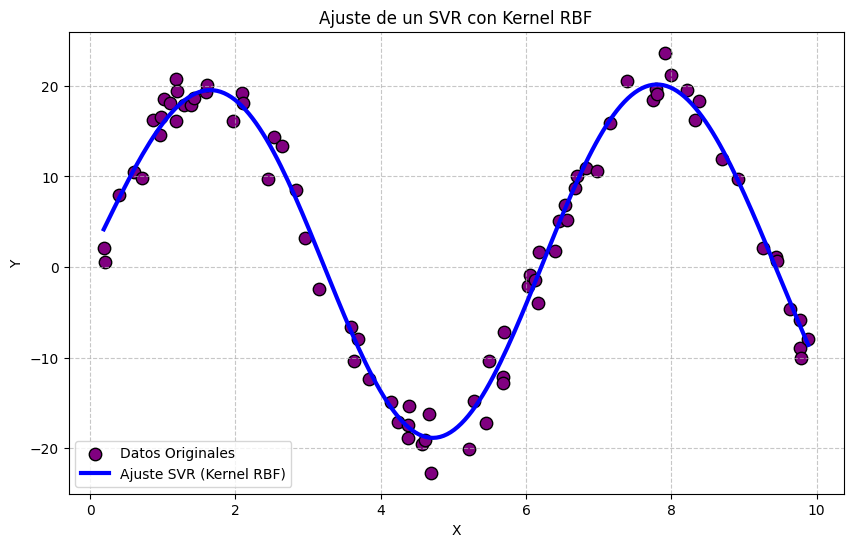


El SVR es capaz de modelar relaciones no lineales continuas.
A diferencia de la regresión lineal que busca minimizar el error en todos los puntos,
el SVR busca una función que se ajuste dentro de un margen de tolerancia (epsilon),
penalizando solo los errores que caen fuera de ese margen.


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generar datos no lineales para regresión
np.random.seed(0)
X_reg = np.sort(np.random.rand(80) * 10).reshape(-1, 1)
y_reg = np.sin(X_reg).flatten() * 20 + np.random.normal(0, 2, 80) # Función seno con ruido

# Dividir datos
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# --- Entrenar un SVR con Kernel RBF ---
# C y gamma son importantes, epsilon define el 'margen de tolerancia' para los errores
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.5)
svr_rbf.fit(X_train_reg, y_train_reg)

# --- Realizar predicciones y evaluar ---
y_pred_reg_svr = svr_rbf.predict(X_test_reg)
mse_svr = mean_squared_error(y_test_reg, y_pred_reg_svr)
r2_svr = r2_score(y_test_reg, y_pred_reg_svr)
print(f"Error Cuadrático Medio (MSE) del SVR: {mse_svr:.2f}")
print(f"R-cuadrado (R^2) del SVR: {r2_svr:.2f}")

# --- Visualizar el ajuste del SVR ---
plt.figure(figsize=(10, 6))
plt.scatter(X_reg, y_reg, color='purple', s=80, edgecolors='black', label='Datos Originales')

# Para graficar la curva del SVR
X_plot_reg = np.linspace(X_reg.min(), X_reg.max(), 200).reshape(-1, 1)
y_pred_plot_reg_svr = svr_rbf.predict(X_plot_reg)
plt.plot(X_plot_reg, y_pred_plot_reg_svr, color='blue', linewidth=3, label='Ajuste SVR (Kernel RBF)')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Ajuste de un SVR con Kernel RBF")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

print("\nEl SVR es capaz de modelar relaciones no lineales continuas.")
print("A diferencia de la regresión lineal que busca minimizar el error en todos los puntos,")
print("el SVR busca una función que se ajuste dentro de un margen de tolerancia (epsilon),")
print("penalizando solo los errores que caen fuera de ese margen.")

Este script demuestra la capacidad de SVR para modelar relaciones no lineales en datos continuos.

- Observa cómo el SVR, usando el kernel RBF, puede ajustar una curva suave a los datos de la función seno con ruido.
- El concepto de epsilon (ε) es clave aquí: SVR no se preocupa por los puntos que caen dentro de este 'tubo' o margen alrededor de la función ajustada; solo penaliza los errores que están fuera de él. Esto hace que el SVR sea robusto a los valores atípicos (outliers).

## Hiperparámetros Clave: C y Gamma / Epsilon

Como con muchos modelos, los SVMs tienen hiperparámetros que deben ser ajustados para obtener el mejor rendimiento. Los más importantes son C y gamma (para kernels no lineales) o epsilon (para SVR).

**Parámetro C (Coste)**:

- Controla la penalización del error de clasificación (o de regresión) y el tamaño del margen.
- Un C pequeño significa una penalización baja: el modelo permite más errores de clasificación (o puntos dentro del margen en SVR) para tener un margen más amplio. Esto lleva a un modelo más suave y regularizado, menos propenso al overfitting (pero podría subajustar).
- Un C grande significa una penalización alta: el modelo intenta clasificar correctamente la mayor cantidad de puntos posible, lo que resulta en un margen más estrecho. Esto puede llevar a un modelo más complejo y potencialmente al overfitting.

**Parámetro gamma (para kernels RBF/Polinomial)**:

 - Controla la influencia de cada punto de entrenamiento o el 'radio de influencia' de un solo ejemplo de entrenamiento. Solo se usa con kernels no lineales (como RBF o Polinomial).
 - Un gamma pequeño significa que cada punto tiene una gran influencia y el modelo es más global (menos sensible a puntos individuales).
 - Un gamma grande significa que cada punto tiene una influencia muy limitada y el modelo es más local y complejo (más propenso al overfitting).

**Parámetro epsilon (para SVR)**:

- Define el margen de tolerancia alrededor de la función ajustada. Los errores dentro de este margen no son penalizados.
- Un epsilon pequeño significa que el modelo es más estricto y penalizará casi cualquier error, lo que lleva a un ajuste más preciso (y potencialmente al overfitting).
- Un epsilon grande significa que el modelo es más tolerante a los errores, llevando a un ajuste más suave (y potencialmente al subajuste).

La elección de estos hiperparámetros es crucial y generalmente se realiza mediante técnicas como la Validación Cruzada y *Grid Search* o Búsqueda Aleatoria (*Randomized Search*), donde se prueban diferentes combinaciones de valores y se evalúa el rendimiento del modelo en un conjunto de validación.

## Ejercicios
Ejercicio 1: Clasificación Lineal con SVC y Visualización de Vectores de Soporte
Enunciado:
"Para este ejercicio, generaremos un conjunto de datos simple que sea linealmente separable y entrenaremos un Support Vector Classifier (SVC) con un kernel lineal.

- Genera datos: Crea un conjunto de datos X, y utilizando make_blobs de sklearn.datasets. Asegúrate de que sean fácilmente separables (ej. n_samples=100, centers=2, random_state=0, cluster_std=0.8) - Aca les dejo como lo harian:

*X_ej1, y_ej1 = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)*


- Divide los datos: Separa X y y en conjuntos de entrenamiento y prueba (80/20) usando train_test_split.

*X_train_ej1, X_test_ej1, y_train_ej1, y_test_ej1 = train_test_split(X_ej1, y_ej1, test_size=0.2, random_state=42)
*

- Entrena el SVC Lineal: Inicializa y entrena un SVC con kernel='linear'. Para este ejercicio, usa un valor de C grande (ej. C=1000) para forzar un margen 'duro' inicial.
- Evalúa el modelo: Calcula e imprime la precisión (accuracy_score) del modelo en el conjunto de prueba.
- ¿Qué pasaría con el margen y los vectores de soporte si redujeras drásticamente el valor de C (ej., C=0.1)? (No es necesario reejecutar, solo responder conceptualmente).

2- Clasificación No Lineal con Kernel RBF
Crea Datos no lineales, utilizando esta linea:

*X_ej2, y_ej2 = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)
*
- Separa X y y en conjuntos de entrenamiento y prueba (80/20) usando train_test_split.
Entrena el SVC RBF: Inicializa y entrena un SVC con kernel='rbf'. Experimenta con C=10 y gamma=0.5.
- Calcula e imprime la precisión (accuracy_score) del modelo en el conjunto de prueba.
- ¿Cómo podrías usar la validación cruzada para encontrar los valores óptimos de C y gamma para este modelo? (No es necesario implementarlo, solo describir la estrategia)."